In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import utils.functions as f

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Direct Dataset

In [4]:
dataset = "direct_matching_20240213"
df_processed = pd.read_csv(f"Data/{dataset}_processed.csv", sep=";")

## Gender

In [5]:
sectors = sorted(df_processed.job_sector.unique())
protected_attribute_gender = "cand_gender"

df_mitigation = df_processed.drop(columns=["distance_km", "match_score", "match_rank", "cand_id", "cand_education", "job_professional_category"]).copy()
columns = df_mitigation.columns
columns = columns.drop(["job_id","job_sector"])

first_language_index = 6

results_df_gender = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_gender,columns)
results_df_gender.to_excel('Results/Mitigation_direct/results_df_gender_direct.xlsx', index=False)
results_df_gender

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Cinese,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco
0,0.0,0.0,11.08,1.69,0.0,3.85,0.00,0.0,0.00,0.0,...,0.00,0.92,0.0,0.00,0.15,0.00,0.00,0.0,0.15,0.00
1,0.0,0.0,20.00,7.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.0,0.00,2.00,0.00,0.00,0.0,0.00,0.00
2,0.0,0.0,45.80,13.69,0.0,1.82,0.00,0.0,0.00,0.0,...,0.18,0.36,0.0,0.18,0.00,0.00,0.00,0.0,0.00,0.00
3,0.0,0.0,21.50,16.75,0.0,6.25,0.75,0.0,0.00,0.0,...,0.50,0.25,0.0,0.00,0.00,0.00,0.25,0.0,0.00,0.00
4,0.0,0.0,62.76,0.00,0.0,0.00,0.26,0.0,0.00,0.0,...,0.00,0.00,0.0,0.26,0.00,0.00,0.00,0.0,0.13,0.00
5,0.0,0.0,20.09,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.0,0.00,0.00
6,0.0,0.0,61.48,26.67,0.0,7.41,0.00,0.0,0.00,0.0,...,0.00,0.37,0.0,0.74,0.00,0.00,0.00,0.0,0.00,0.00
7,0.0,0.0,37.74,44.57,0.0,10.61,0.00,0.0,0.07,0.0,...,0.00,0.35,0.0,0.00,0.00,0.04,0.00,0.0,0.07,0.00
8,0.0,0.0,49.52,9.47,0.0,28.41,0.16,0.0,0.08,0.0,...,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.0,0.00,0.00
9,0.0,0.0,39.26,10.74,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.37,0.0,0.00,1.48,0.00,0.00,0.0,0.00,1.11


In [6]:
%matplotlib inline

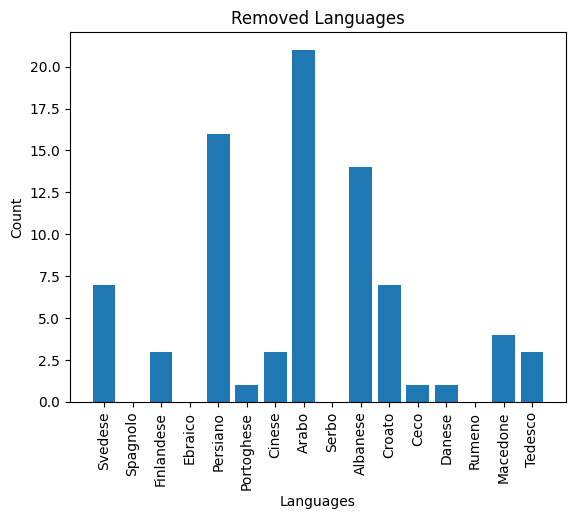

In [7]:
results_df_gender_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_gender,columns,'total')
sums_gender = results_df_gender_total.iloc[:, first_language_index:].sum()
f.plot_series(sums_gender,'Removed Languages','Languages')

In [8]:
job_df_orig_gender, job_df_repaired_gender = f.compute_repaired_df(df_mitigation,7,protected_attribute_gender)

In [9]:
with open('utils/encodings/direct_matching_20240213_cand_domicile_region_encoding.json', 'r') as file:
    region_mapping = json.load(file)
with open('utils/encodings/direct_matching_20240213_provinces_encoding.json', 'r') as file:
    province_mapping = json.load(file)

reversed_region_mapping = {v: k for k, v in region_mapping.items()}
reversed_province_mapping = {v: k for k, v in province_mapping.items()}

job_df_orig_gender['cand_domicile_region_str'] = job_df_orig_gender['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_gender['cand_domicile_region_str'] = job_df_repaired_gender['cand_domicile_region'].map(reversed_region_mapping)

job_df_orig_gender['cand_domicile_province_str'] = job_df_orig_gender['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_gender['cand_domicile_province_str'] = job_df_repaired_gender['cand_domicile_province'].map(reversed_province_mapping)

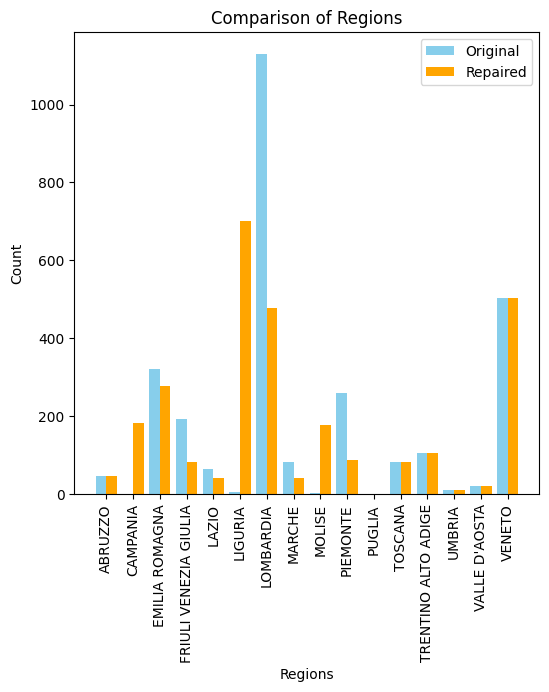

In [10]:
orig_counts = job_df_orig_gender['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_gender['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Age

In [11]:
protected_attribute_age = "cand_age_bucket"

results_df_age = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_age,columns)
results_df_age.to_excel('Results/Mitigation_direct/results_df_age_direct.xlsx', index=False)
results_df_age

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Cinese,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco
0,0.0,0.0,69.08,7.69,0.0,12.62,0.00,0.00,0.00,0.00,...,0.00,0.92,0.0,0.00,0.15,0.00,0.00,0.00,0.15,1.23
1,0.0,0.0,76.00,26.00,0.0,30.00,0.00,5.00,0.00,8.00,...,0.00,0.00,0.0,0.00,2.00,0.00,0.00,0.00,0.00,2.00
2,0.0,0.0,75.91,33.76,0.0,61.31,0.00,0.00,0.00,0.00,...,0.18,0.36,0.0,0.18,1.82,0.00,0.00,0.00,0.00,3.10
3,0.0,0.0,82.75,66.75,0.0,32.75,0.75,0.00,0.00,0.00,...,0.50,0.25,0.0,0.00,0.00,0.00,0.25,0.00,0.00,2.75
4,0.0,0.0,57.76,56.71,0.0,14.08,0.26,0.00,0.00,0.00,...,0.00,0.39,0.0,0.26,0.53,0.00,0.00,0.00,0.13,0.66
5,0.0,0.0,47.64,18.49,0.0,21.81,0.00,0.00,0.00,0.00,...,0.00,1.79,0.0,0.32,0.51,0.00,0.00,0.00,0.00,0.00
6,0.0,0.0,52.96,31.48,0.0,44.07,0.00,0.00,0.00,5.19,...,0.00,0.37,0.0,0.74,0.74,0.00,0.00,0.00,0.00,1.48
7,0.0,0.0,57.27,12.10,0.0,35.41,0.07,0.00,0.07,0.00,...,0.00,0.00,0.0,0.21,0.00,0.04,0.00,0.00,0.07,0.28
8,0.0,0.0,61.56,14.21,0.0,29.21,0.16,2.25,0.08,0.00,...,0.00,0.72,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.56
9,0.0,0.0,41.48,58.89,0.0,23.33,0.00,4.07,0.00,5.93,...,0.00,0.37,0.0,0.00,1.48,0.00,0.00,15.93,0.00,1.11


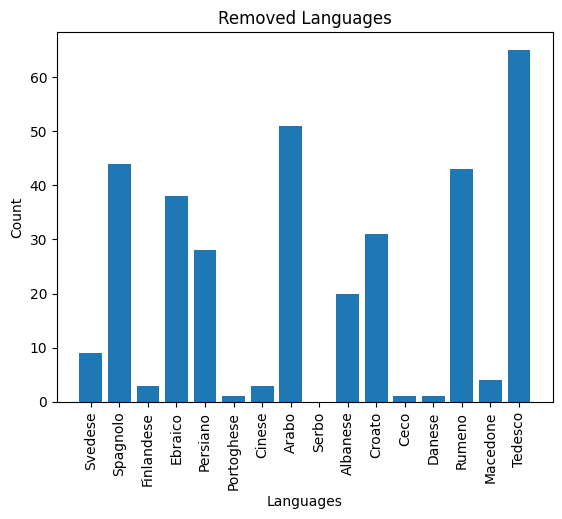

In [12]:
results_df_age_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_age,columns,'total')
sums_age = results_df_age_total.iloc[:, first_language_index:].sum()
f.plot_series(sums_age,'Removed Languages','Languages')

In [13]:
job_df_orig_age, job_df_repaired_age = f.compute_repaired_df(df_mitigation,3,protected_attribute_age)
job_df_orig_age['job_work_province_str'] = job_df_orig_age['job_work_province'].map(reversed_province_mapping)
job_df_repaired_age['job_work_province_str'] = job_df_repaired_age['job_work_province'].map(reversed_province_mapping)

job_df_orig_age['cand_domicile_region_str'] = job_df_orig_age['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_age['cand_domicile_region_str'] = job_df_repaired_age['cand_domicile_region'].map(reversed_region_mapping)

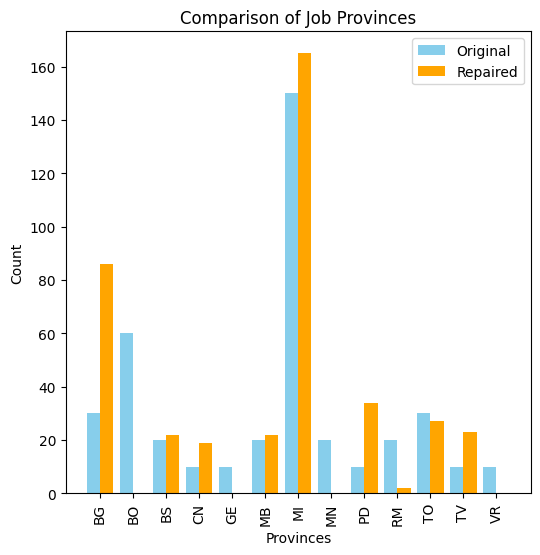

In [14]:
orig_counts = job_df_orig_age['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_age['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces')

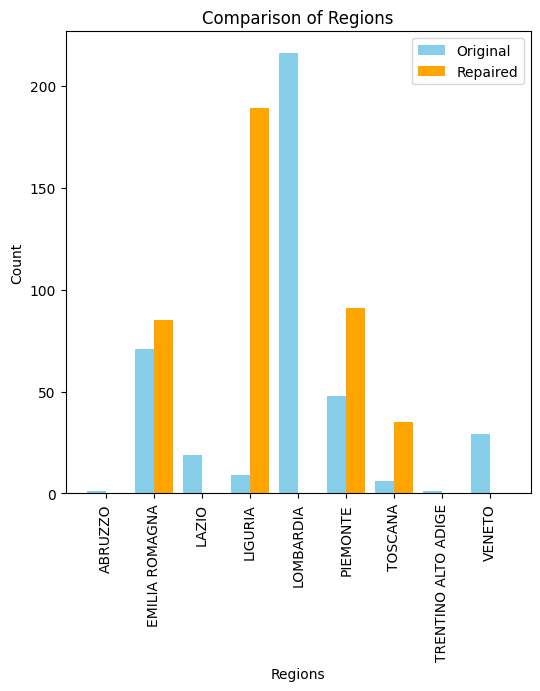

In [15]:
orig_counts = job_df_orig_age['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_age['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Location

In [16]:
protected_attribute_location = "same_location"
results_df_location = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_location,columns)
results_df_location.to_excel('Results/Mitigation_direct/results_df_location_direct.xlsx', index=False)
results_df_location

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco,same_location
0,0.0,0.0,63.38,32.77,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.15,0.00,0.00,0.0,0.15,0.00,0.0
1,0.0,0.0,64.00,57.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,2.00,0.00,0.00,0.0,0.00,2.00,0.0
2,0.0,0.0,65.15,6.20,0.0,2.01,0.00,0.0,0.00,0.0,...,0.00,0.0,0.18,0.00,0.00,0.00,0.0,0.00,0.00,0.0
3,0.0,0.0,79.00,50.25,0.0,24.75,0.75,0.0,0.00,0.0,...,0.25,0.0,0.00,0.00,0.00,0.25,0.0,0.00,0.00,0.0
4,0.0,0.0,54.87,64.87,0.0,23.16,0.26,0.0,0.00,0.0,...,0.00,0.0,0.26,0.00,0.00,0.00,0.0,0.13,0.66,0.0
5,0.0,0.0,72.39,2.10,0.0,0.00,0.00,0.0,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
6,0.0,0.0,66.30,44.81,0.0,10.74,0.00,0.0,0.00,0.0,...,0.37,0.0,0.00,0.74,0.00,0.00,0.0,0.00,0.00,0.0
7,0.0,0.0,53.94,46.16,0.0,28.69,0.07,0.0,0.07,0.0,...,0.00,0.0,0.00,0.00,0.04,0.00,0.0,0.00,0.00,0.0
8,0.0,0.0,73.43,12.36,0.0,18.46,0.16,0.0,0.08,0.0,...,0.00,0.0,0.32,0.00,0.00,0.00,0.0,0.00,0.00,0.0
9,0.0,0.0,57.04,47.04,0.0,0.00,0.00,0.0,0.00,0.0,...,0.37,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0


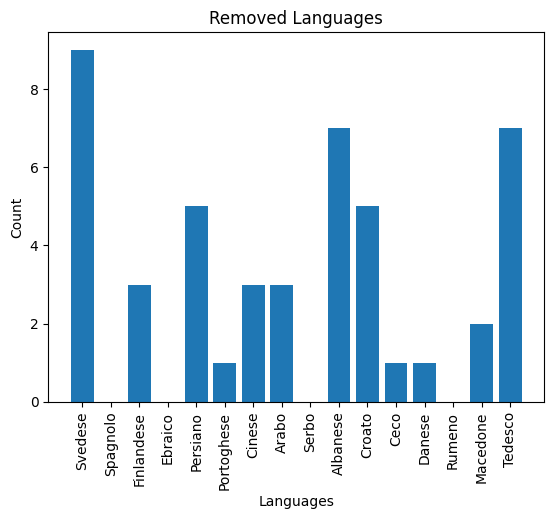

In [17]:
results_df_location_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_location,columns,'total')
sums_location = results_df_location_total.iloc[:, first_language_index:-1].sum() #-1 since we add another column for location bias
f.plot_series(sums_location,'Removed Languages','Languages')

In [18]:
job_df_orig_location, job_df_repaired_location = f.compute_repaired_df(df_mitigation,4,protected_attribute_location)
job_df_orig_location['job_work_province_str'] = job_df_orig_location['job_work_province'].map(reversed_province_mapping)
job_df_repaired_location['job_work_province_str'] = job_df_repaired_location['job_work_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_province_str'] = job_df_orig_location['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_location['cand_domicile_province_str'] = job_df_repaired_location['cand_domicile_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_region_str'] = job_df_orig_location['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_location['cand_domicile_region_str'] = job_df_repaired_location['cand_domicile_region'].map(reversed_region_mapping)

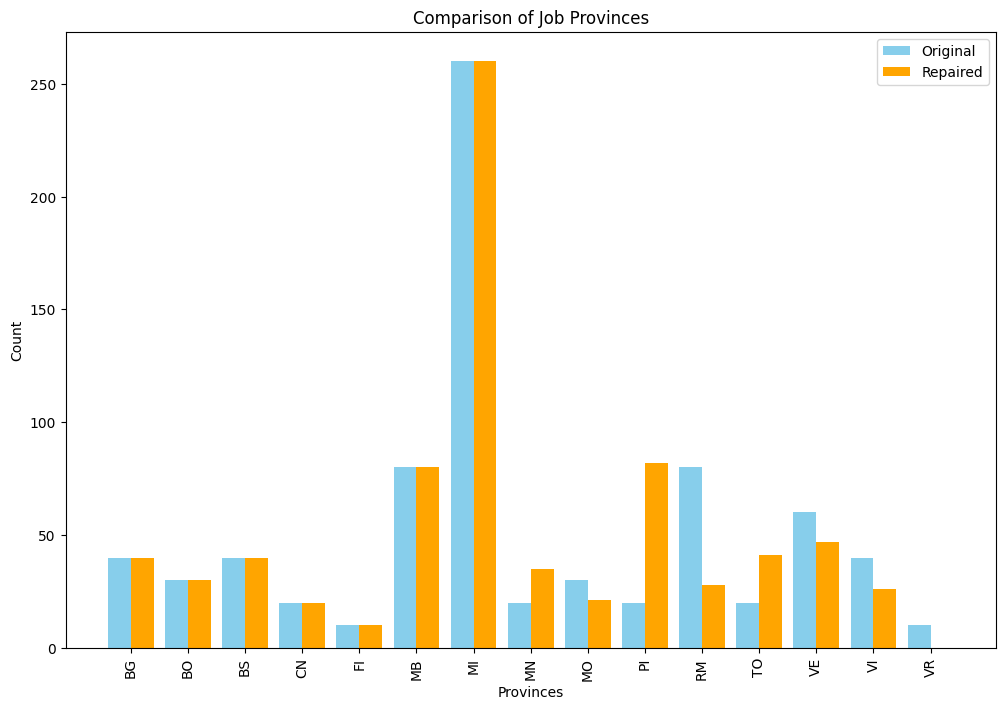

In [19]:
orig_counts = job_df_orig_location['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_location['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(12,8))

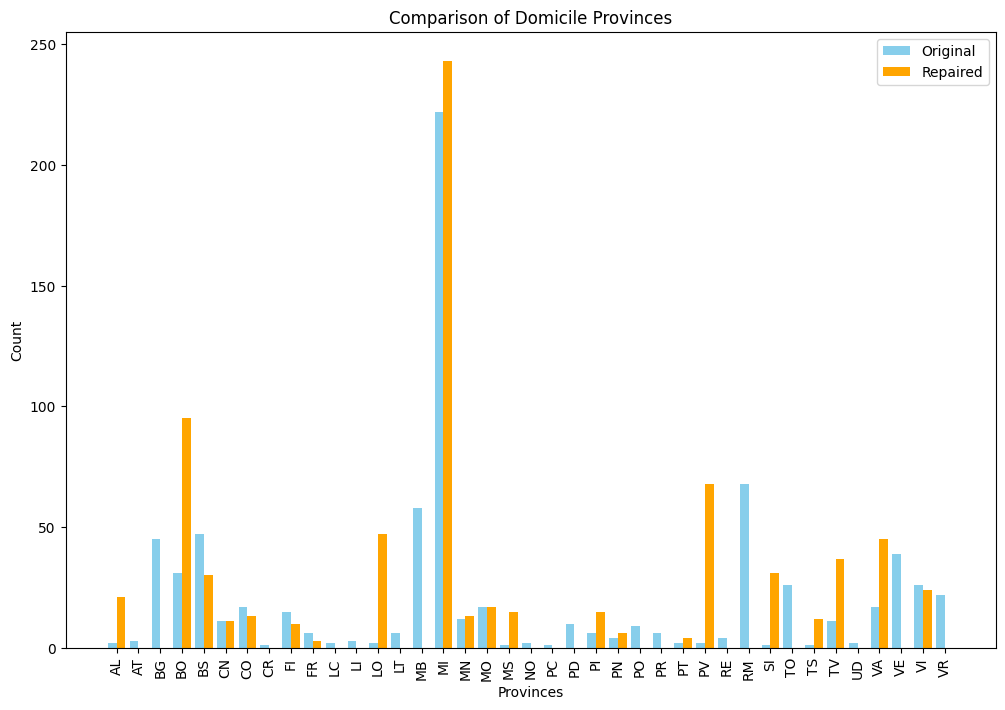

In [20]:
orig_counts = job_df_orig_location['cand_domicile_province_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Domicile Provinces','Provinces',size=(12,8))

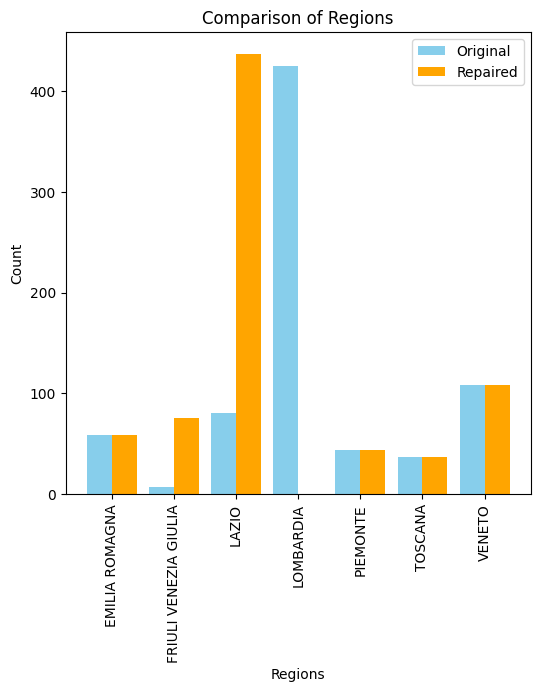

In [21]:
orig_counts = job_df_orig_location['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

# Reverse Dataset


In [22]:
dataset = "reverse_matching_20240213"
df_processed = pd.read_csv(f"Data/{dataset}_processed.csv", sep=";")
df_mitigation = df_processed.drop(columns=["distance_km", "match_score", "match_rank", "cand_id", "cand_education", "job_professional_category"]).copy()
columns = df_mitigation.columns
columns = columns.drop(["job_id","job_sector"])
sectors = sorted(df_processed.job_sector.unique())

## Gender

In [23]:
protected_attribute_gender = "cand_gender"

results_df_gender = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_gender,columns)
results_df_gender.to_excel('Results/Mitigation_reverse/results_df_gender_reverse.xlsx', index=False)
results_df_gender

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Norvegese,Catalano,Macedone,Portoghese,...,Finlandese,Albanese,Danese,Ebraico,Spagnolo,Serbo,Greco,Cinese,Bulgaro,Rumeno
0,0.0,0.0,39.19,0.00,0.0,31.10,0.04,0.01,0.00,0.07,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,0.0,0.0,52.09,34.20,0.0,0.00,0.00,0.00,0.39,0.00,...,0.13,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2,0.0,0.0,33.83,15.18,0.0,0.00,0.25,0.00,0.00,0.16,...,0.03,0.16,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0
3,0.0,0.0,28.80,0.00,0.0,0.00,0.00,0.03,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0
4,0.0,0.0,22.84,0.00,0.0,0.00,0.03,0.00,0.00,0.01,...,0.00,0.00,0.03,0.0,0.0,0.0,0.02,0.00,0.05,0.0
5,0.0,0.0,61.22,48.83,0.0,31.92,0.00,0.00,0.15,0.15,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.29,0.29,0.0
6,0.0,0.0,32.91,40.98,0.0,0.00,0.00,0.00,0.08,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.08,0.00,0.0
7,0.0,0.0,28.98,0.00,0.0,0.00,0.02,0.00,0.00,0.04,...,0.00,0.00,0.00,0.0,0.0,0.0,0.03,0.00,0.00,0.0
8,0.0,0.0,55.62,31.28,0.0,7.58,0.04,0.03,0.02,0.01,...,0.01,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.0
9,0.0,0.0,34.77,0.00,0.0,0.00,0.01,0.01,0.00,0.01,...,0.00,0.00,0.03,0.0,0.0,0.0,0.01,0.00,0.00,0.0


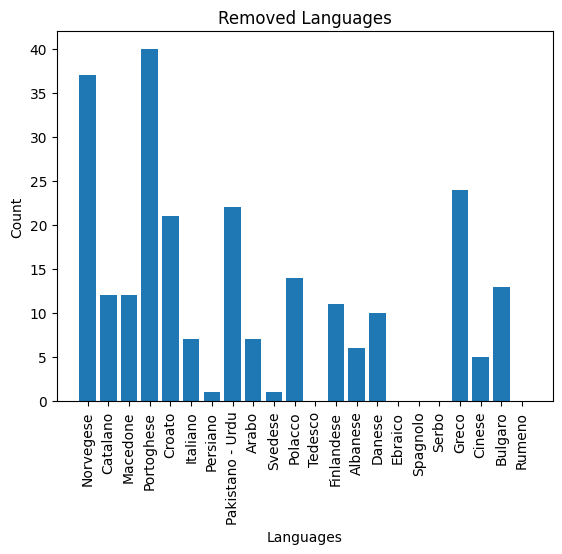

In [24]:
results_df_gender_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_gender,columns,'total')
sums_gender = results_df_gender_total.iloc[:, first_language_index:].sum()
f.plot_series(sums_gender,'Removed Languages','Languages')

In [25]:
job_df_orig_gender, job_df_repaired_gender = f.compute_repaired_df(df_mitigation,5,protected_attribute_gender)

In [26]:
with open('utils/encodings/reverse_matching_20240213_cand_domicile_region_encoding.json', 'r') as file:
    region_mapping = json.load(file)
with open('utils/encodings/reverse_matching_20240213_provinces_encoding.json', 'r') as file:
    province_mapping = json.load(file)

reversed_region_mapping = {v: k for k, v in region_mapping.items()}
reversed_province_mapping = {v: k for k, v in province_mapping.items()}

job_df_orig_gender['cand_domicile_region_str'] = job_df_orig_gender['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_gender['cand_domicile_region_str'] = job_df_repaired_gender['cand_domicile_region'].map(reversed_region_mapping)

job_df_orig_gender['cand_domicile_province_str'] = job_df_orig_gender['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_gender['cand_domicile_province_str'] = job_df_repaired_gender['cand_domicile_province'].map(reversed_province_mapping)

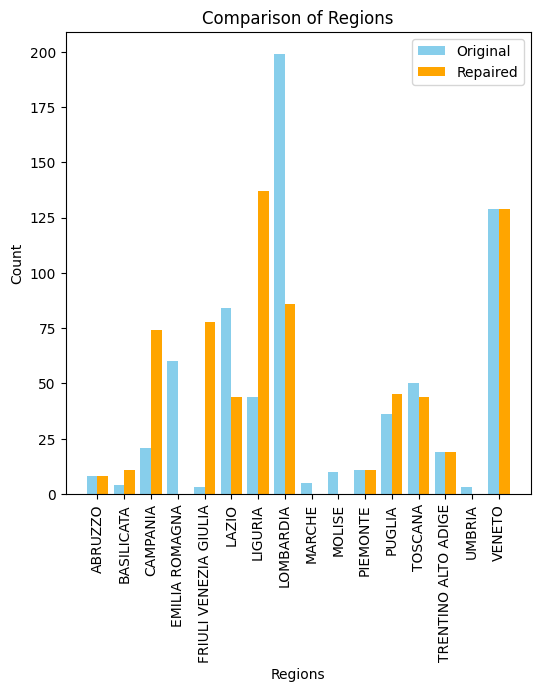

In [27]:
orig_counts = job_df_orig_gender['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_gender['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Age

In [28]:
protected_attribute_age = "cand_age_bucket"

results_df_age = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_age,columns)
results_df_age.to_excel('Results/Mitigation_reverse/results_df_age_reverse.xlsx', index=False)
results_df_age

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Norvegese,Catalano,Macedone,Portoghese,...,Finlandese,Albanese,Danese,Ebraico,Spagnolo,Serbo,Greco,Cinese,Bulgaro,Rumeno
0,0.0,0.0,45.80,14.61,0.42,20.76,0.04,0.01,0.07,0.07,...,0.00,0.26,0.00,0.0,0.00,0.0,0.00,0.28,0.10,0.0
1,0.0,0.0,68.54,47.91,0.00,18.41,0.00,0.00,0.39,0.00,...,0.13,0.39,0.00,0.0,4.57,0.0,0.00,0.00,0.00,0.0
2,0.0,0.0,59.88,32.56,0.00,50.43,0.25,0.00,0.00,0.16,...,0.03,0.16,0.00,0.0,0.00,0.0,0.00,0.19,0.00,0.0
3,0.0,0.0,48.70,23.25,0.09,10.49,0.00,0.03,0.04,0.00,...,0.00,0.25,0.00,0.0,0.00,0.0,0.00,0.19,0.00,0.0
4,0.0,0.0,52.10,11.77,0.00,22.23,0.03,0.05,0.15,0.01,...,0.02,0.14,0.03,0.0,0.00,0.0,0.02,0.41,0.05,0.0
5,0.0,0.0,68.37,58.02,0.00,32.51,0.00,0.00,0.15,0.15,...,0.00,0.44,0.00,0.0,0.00,0.0,0.00,0.29,0.29,0.0
6,0.0,0.0,63.61,29.75,0.79,29.51,0.00,0.00,0.08,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.08,0.00,0.0
7,0.0,0.0,42.73,23.12,0.00,18.48,0.02,0.02,0.08,0.04,...,0.00,0.00,0.00,0.0,0.00,0.0,0.03,0.13,0.04,0.0
8,0.0,0.0,56.27,44.09,0.05,27.63,0.04,0.03,0.02,0.01,...,0.01,0.00,0.00,0.0,0.00,0.0,0.01,0.14,0.15,0.0
9,0.0,0.0,50.90,43.85,0.00,24.82,0.01,0.01,0.01,0.01,...,0.03,0.00,0.03,0.0,0.00,0.0,0.01,0.31,0.04,0.0


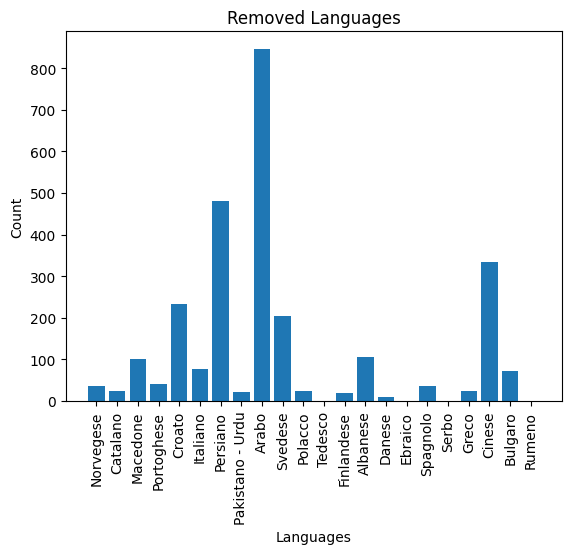

In [29]:
results_df_age_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_age,columns,'total')
sums_age = results_df_age_total.iloc[:, first_language_index:].sum()
f.plot_series(sums_age,'Removed Languages','Languages')

In [30]:
job_df_orig_age, job_df_repaired_age = f.compute_repaired_df(df_mitigation,14,protected_attribute_age)
job_df_orig_age['job_work_province_str'] = job_df_orig_age['job_work_province'].map(reversed_province_mapping)
job_df_repaired_age['job_work_province_str'] = job_df_repaired_age['job_work_province'].map(reversed_province_mapping)

job_df_orig_age['cand_domicile_region_str'] = job_df_orig_age['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_age['cand_domicile_region_str'] = job_df_repaired_age['cand_domicile_region'].map(reversed_region_mapping)

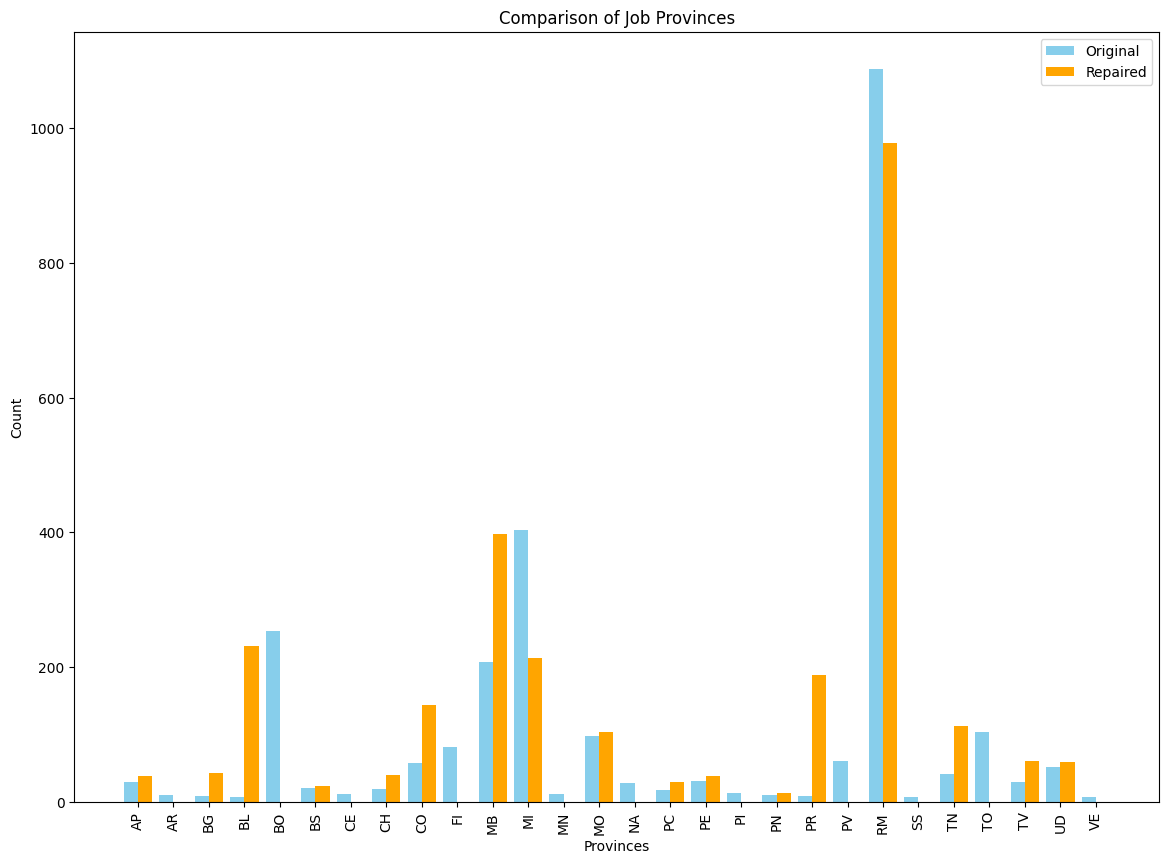

In [31]:
orig_counts = job_df_orig_age['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_age['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(14,10))

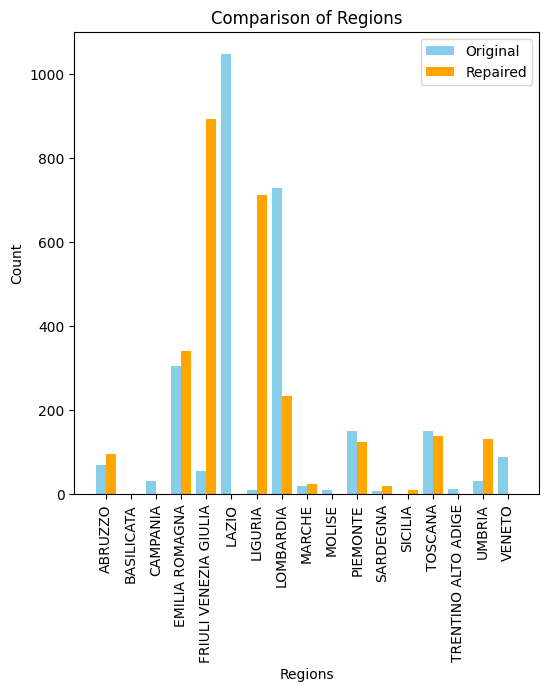

In [32]:
orig_counts = job_df_orig_age['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_age['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Location

In [33]:
protected_attribute_location = "same_location"
results_df_location = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_location,columns)
results_df_location.to_excel('Results/Mitigation_reverse/results_df_location_reverse.xlsx', index=False)
results_df_location

,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Norvegese,Catalano,Macedone,Portoghese,...,Albanese,Danese,Ebraico,Spagnolo,Serbo,Greco,Cinese,Bulgaro,Rumeno,same_location
0,0.0,0.0,46.03,22.64,0.0,14.21,0.00,0.01,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
1,0.0,0.0,76.50,74.67,0.0,27.94,0.00,0.00,0.39,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2,0.0,0.0,52.42,53.30,0.0,51.66,0.00,0.00,0.00,0.16,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3,0.0,0.0,66.73,0.89,0.0,18.26,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
4,0.0,0.0,47.70,12.04,0.0,17.57,0.00,0.00,0.00,0.01,...,0.00,0.03,0.0,0.0,0.0,0.02,0.00,0.00,0.0,0.0
5,0.0,0.0,77.11,22.74,0.0,50.44,0.00,0.00,0.15,0.15,...,0.00,0.00,0.0,0.0,0.0,0.00,0.29,0.29,0.0,0.0
6,0.0,0.0,79.35,13.53,0.0,0.00,0.00,0.00,0.08,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.08,0.00,0.0,0.0
7,0.0,0.0,47.44,15.58,0.0,27.09,0.00,0.02,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
8,0.0,0.0,57.14,16.43,0.0,1.54,0.00,0.03,0.02,0.01,...,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0
9,0.0,0.0,53.76,16.22,0.0,37.78,0.01,0.00,0.00,0.01,...,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0


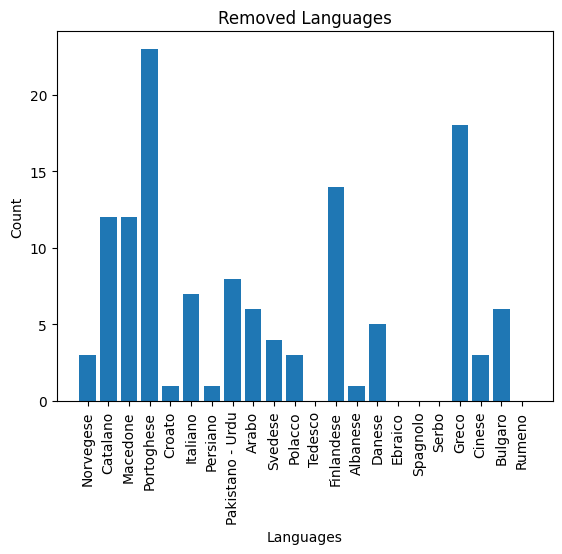

In [34]:
results_df_location_total = f.compute_bias_differences_percentage(df_mitigation,sectors,protected_attribute_location,columns,'total')
sums_location = results_df_location_total.iloc[:, first_language_index:-1].sum()
f.plot_series(sums_location,'Removed Languages','Languages')

In [35]:
job_df_orig_location, job_df_repaired_location = f.compute_repaired_df(df_mitigation,1,protected_attribute_location)
job_df_orig_location['job_work_province_str'] = job_df_orig_location['job_work_province'].map(reversed_province_mapping)
job_df_repaired_location['job_work_province_str'] = job_df_repaired_location['job_work_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_province_str'] = job_df_orig_location['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_location['cand_domicile_province_str'] = job_df_repaired_location['cand_domicile_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_region_str'] = job_df_orig_location['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_location['cand_domicile_region_str'] = job_df_repaired_location['cand_domicile_region'].map(reversed_region_mapping)

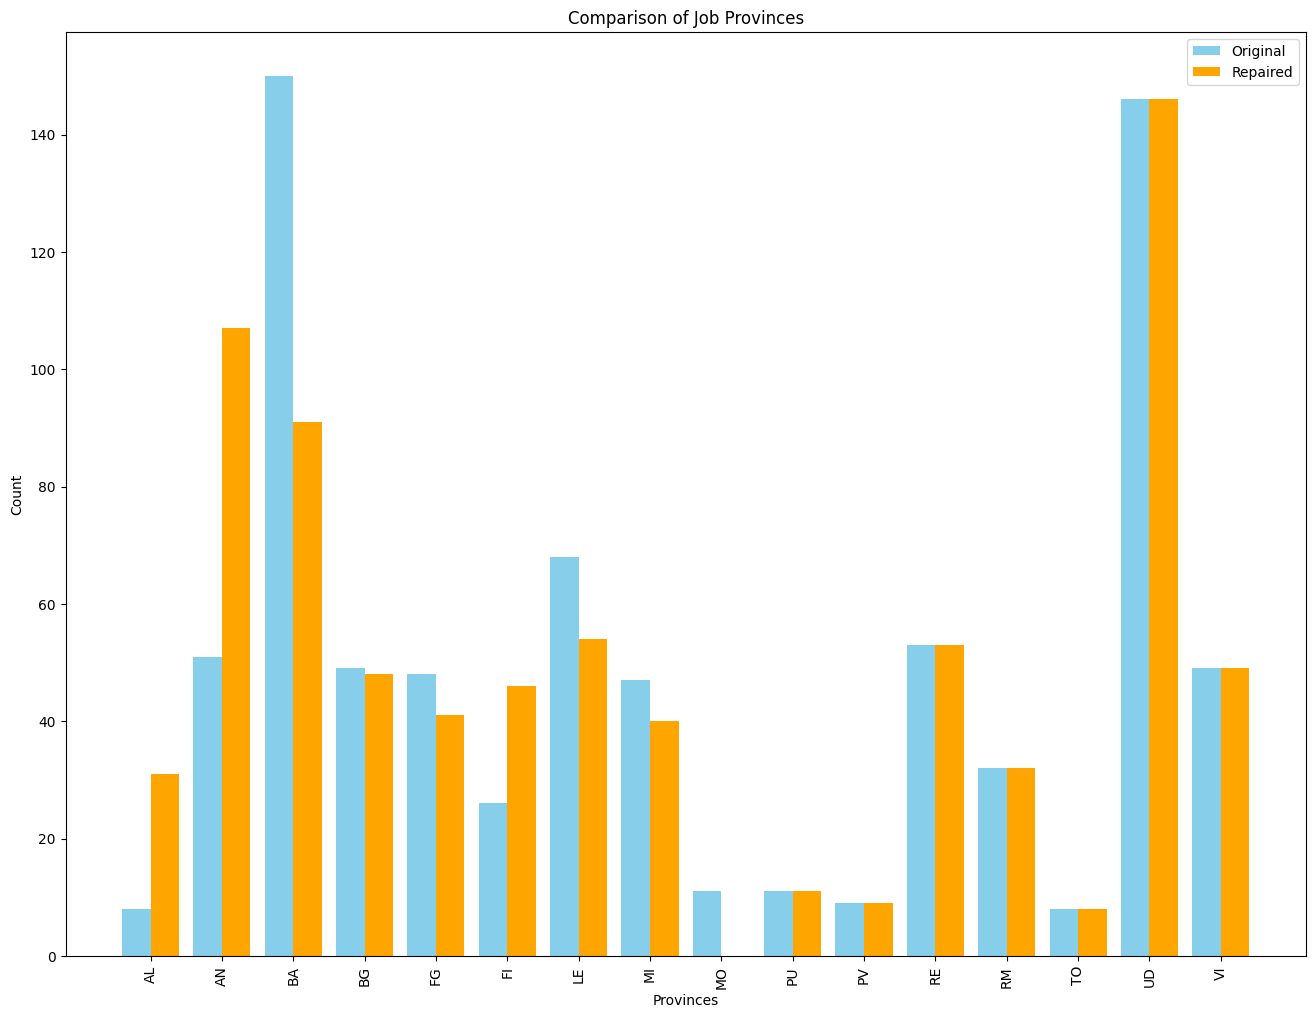

In [36]:
orig_counts = job_df_orig_location['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_location['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(16,12))

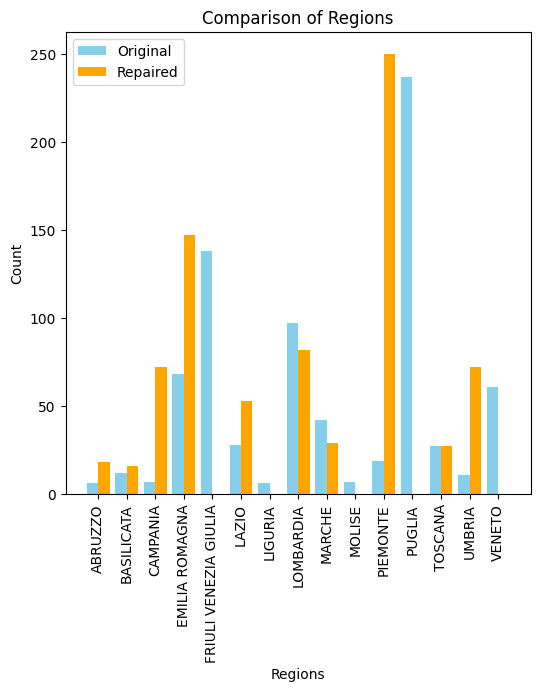

In [37]:
orig_counts = job_df_orig_location['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')